In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
import yaml
import numpy as np
path = "../output/block_opt_eval_opt_d4.txt"
with open(path, 'r') as f:
    result = yaml.full_load(f)

In [66]:
for i in result['parameters'].keys():
    print(i,": ",result['parameters'][i])

dim :  4
range_lo :  -2.048
range_hi :  2.048
swarm_size :  14
k_size :  28
opt_goal :  1e-07
num_trial :  10
side_len :  0.005
block_size :  32


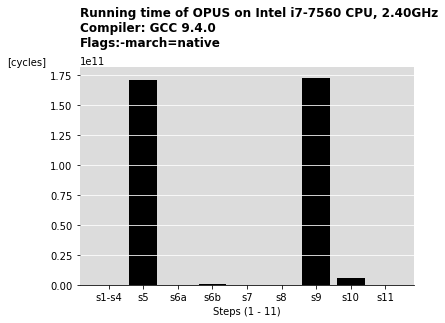

In [59]:
cost_for_each_step_total = []
cost_for_each_step_total.append(result['step1to4'])
cost_for_each_step_total.append(sum(result['step5_time']))
cost_for_each_step_total.append(sum(result['step6a']))
cost_for_each_step_total.append(sum(result['step6b']))
cost_for_each_step_total.append(sum(result['step7']))
cost_for_each_step_total.append(sum(result['step8']))
cost_for_each_step_total.append(sum(result['step9_time']))
cost_for_each_step_total.append(sum(result['step10']))
cost_for_each_step_total.append(sum(result['step11']))

cost_for_each_step_total_name = ["s1-s4","s5", "s6a", "s6b","s7", "s8", "s9", "s10", "s11"]
fig, ax = plt.subplots()
ax.bar(range(len(cost_for_each_step_total)),cost_for_each_step_total,tick_label=cost_for_each_step_total_name, color='black')
ax.set_xlabel('Steps (1 - 11)')
ax.set_ylabel('[cycles]', loc = 'top', rotation="horizontal")
ax.grid(axis="y", color='white')
ax.set_facecolor(color='gainsboro')
ax.set_title('Running time of OPUS on Intel i7-7560 CPU, 2.40GHz\nCompiler: GCC 9.4.0\nFlags:-march=native\n', loc='left', fontweight="bold")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [35]:
def plot_step_info(step_name):
    plt.plot(range(len(result[step_name])),result[step_name])

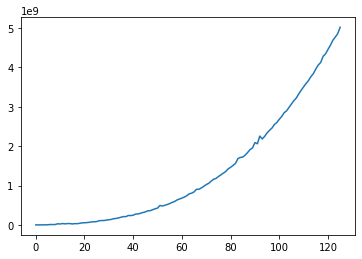

In [36]:
plot_step_info('step5_time')

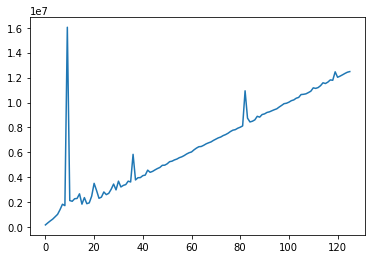

In [29]:
plot_step_info('step6b')

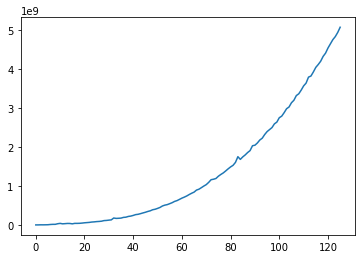

In [37]:
plot_step_info('step9_time')

In [92]:
def plot_step_performance(step_name):
    plt.figure(figsize=(20,14), dpi= 160)
    run_time = result['step' + step_name + '_time']
    flops = result['step' + step_name + '_flop']
    performance = [w/t for t, w in zip(run_time, flops)]
    fig, ax = plt.subplots()
    x_list = np.arange(0, len(performance), 1)
    
    ax.set_xlabel('iterations')
    ax.set_ylabel('[flops/cycle]', loc = 'top', rotation="horizontal")
    ax.grid(axis="y", color='white')
    ax.set_facecolor(color='gainsboro')
    ax.set_title('Performance of OPUS (step{}) on Intel i7-7560 CPU, 2.40GHz\nCompiler: GCC 9.4.0\nFlags:-march=native\n'.format(step_name), loc='left', fontweight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.plot(x_list, performance, marker = "o", color = 'brown', markersize= 3)
    # plt.plot(range(len()),result[step_name])

<Figure size 3200x2240 with 0 Axes>

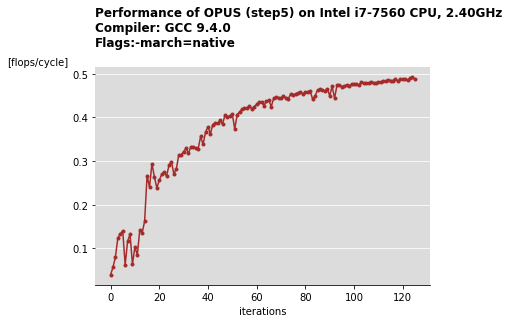

In [93]:
plot_step_performance('5')

<Figure size 3200x2240 with 0 Axes>

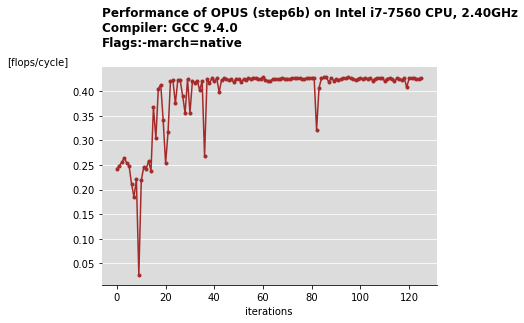

In [94]:
plot_step_performance('6b')

<Figure size 3200x2240 with 0 Axes>

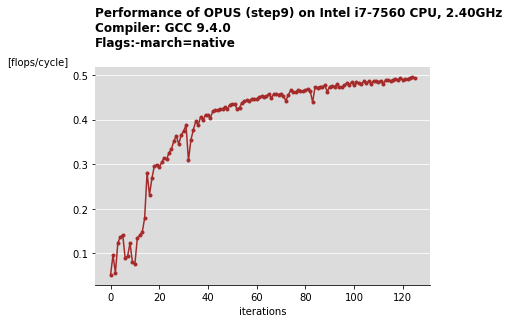

In [95]:
plot_step_performance('9')